In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import files
uploaded = files.upload()
# Assuming the file is named "Global_Cybersecurity_Threats_2015-2024.csv"
df = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")

Saving Global_Cybersecurity_Threats_2015-2024.csv to Global_Cybersecurity_Threats_2015-2024 (1).csv


In [3]:
# View structure
df.head()

# Check for missing values
print(df.isnull().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Convert columns to appropriate types if needed
df['Year'] = df['Year'].astype(int)
df['Financial Loss (in Million $)'] = pd.to_numeric(df['Financial Loss (in Million $)'], errors='coerce')
df['Incident Resolution Time (in Hours)'] = pd.to_numeric(df['Incident Resolution Time (in Hours)'], errors='coerce')

# Fill or drop missing values
df.dropna(inplace=True)  # Or use df.fillna(method='ffill') depending on need

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


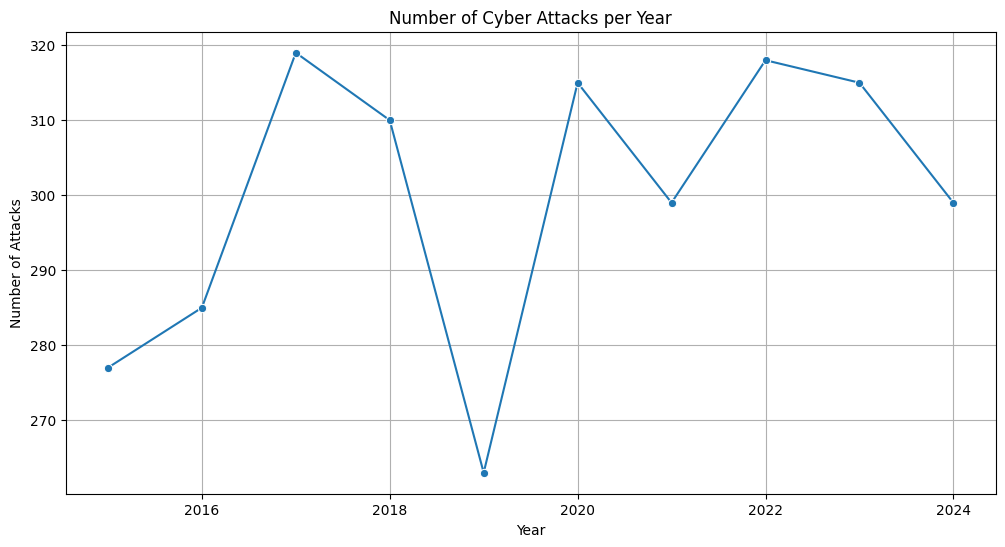

In [4]:
attack_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=attack_year.index, y=attack_year.values, marker='o')
plt.title('Number of Cyber Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid()
plt.show()

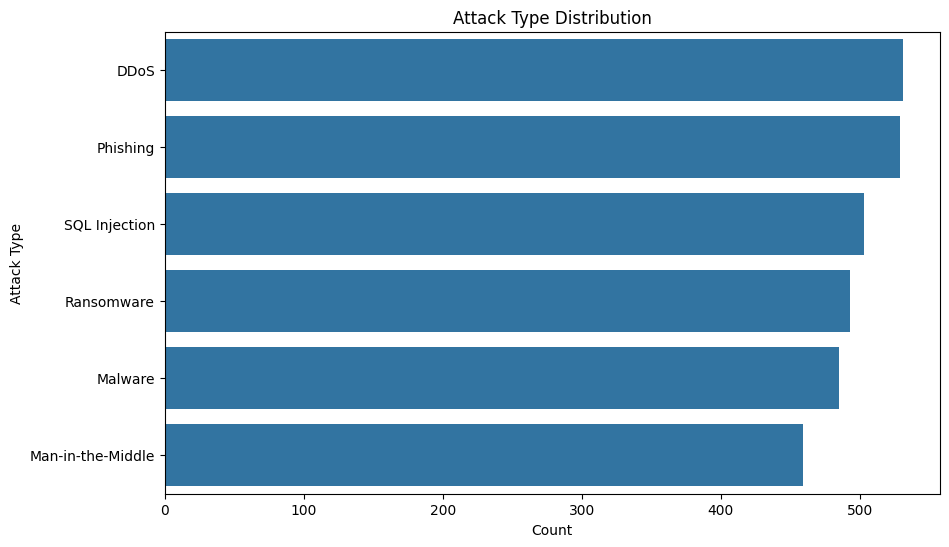

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(y='Attack Type', data=df, order=df['Attack Type'].value_counts().index)
plt.title('Attack Type Distribution')
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.show()

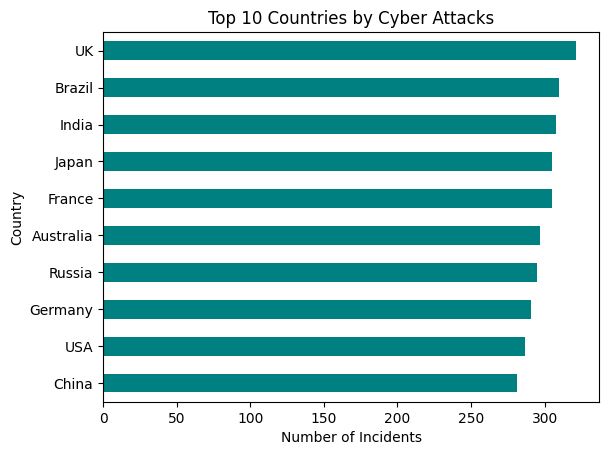

In [6]:
top_countries = df['Country'].value_counts().head(10)
top_countries.plot(kind='barh', color='teal')
plt.title('Top 10 Countries by Cyber Attacks')
plt.xlabel('Number of Incidents')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()

In [7]:
loss_by_year = df.groupby('Year')['Financial Loss (in Million $)'].sum().reset_index()
px.bar(loss_by_year, x='Year', y='Financial Loss (in Million $)', title='Total Financial Loss per Year')

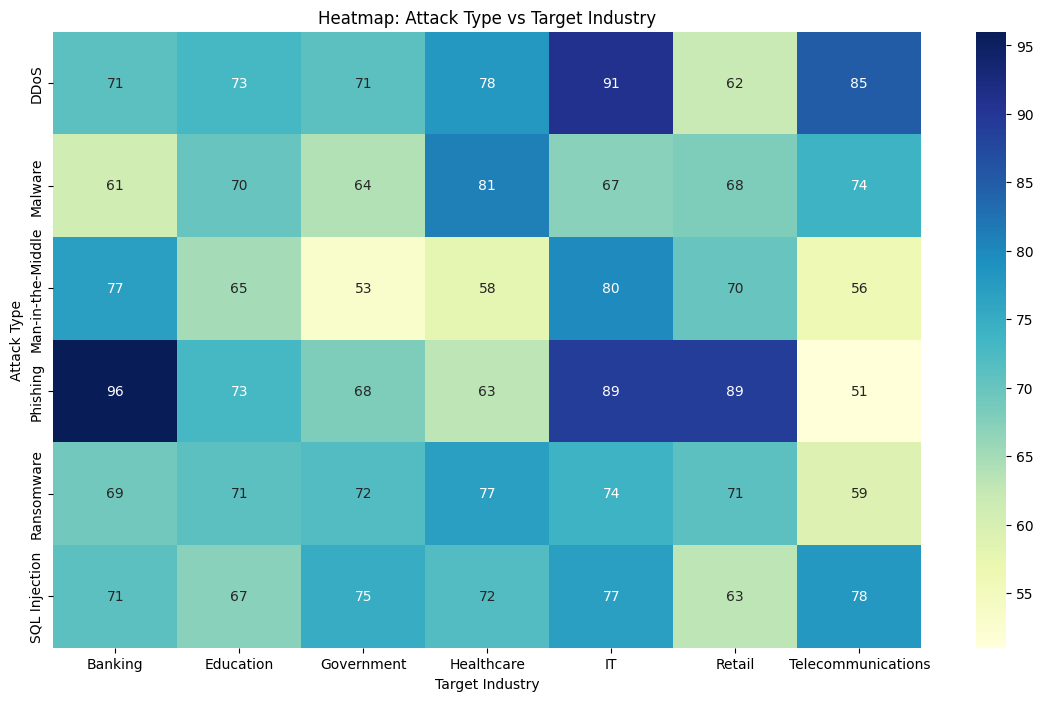

In [8]:
heat_data = pd.crosstab(df['Attack Type'], df['Target Industry'])
plt.figure(figsize=(14,8))
sns.heatmap(heat_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap: Attack Type vs Target Industry')
plt.show()

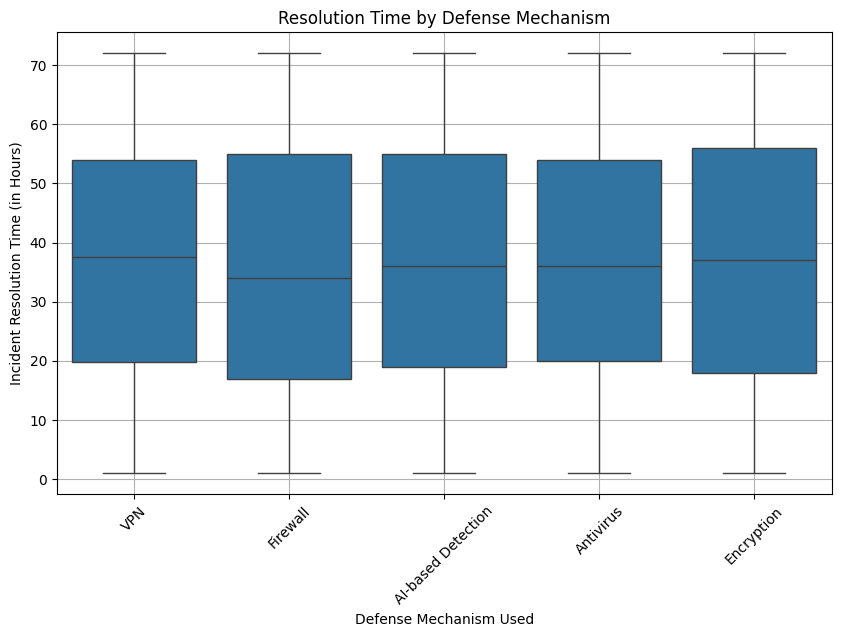

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Defense Mechanism Used', y='Incident Resolution Time (in Hours)', data=df)
plt.xticks(rotation=45)
plt.title('Resolution Time by Defense Mechanism')
plt.grid()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop irrelevant or high-cardinality columns
df_ml = df.drop(columns=['Country', 'Year'])

# Encode categorical columns
label_encoders = {}
for col in df_ml.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
    label_encoders[col] = le

# Define features and target
X = df_ml.drop(columns=['Attack Type'])
y = df_ml['Attack Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate
for name, model in models.items():
    print(f"=== {name} ===")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

=== Logistic Regression ===
Accuracy: 0.13166666666666665
Confusion Matrix:
 [[19 15  0 40 34  3]
 [25  7  0 27 35  3]
 [26  8  0 34 29  2]
 [21 11  0 35 35  1]
 [17 11  0 32 18  1]
 [26 10  0 40 35  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.17      0.16       111
           1       0.11      0.07      0.09        97
           2       0.00      0.00      0.00        99
           3       0.17      0.34      0.23       103
           4       0.10      0.23      0.14        79
           5       0.00      0.00      0.00       111

    accuracy                           0.13       600
   macro avg       0.09      0.14      0.10       600
weighted avg       0.09      0.13      0.10       600

--------------------------------------------------
=== Decision Tree ===
Accuracy: 0.15333333333333332
Confusion Matrix:
 [[18 16 25 13 17 22]
 [16 15 11 21 17 17]
 [23 19 11 22  6 18]
 [20 13 15 18 17 20]
 [12 14 10 13 14 16]
 [

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy: 0.16166666666666665
Confusion Matrix:
 [[23 17 12 21 17 21]
 [21 16 11 21 13 15]
 [12 20 18 14 15 20]
 [16 17  9 16 23 22]
 [16 10 10 20  9 14]
 [22 23 10 23 18 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.21      0.21       111
           1       0.16      0.16      0.16        97
           2       0.26      0.18      0.21        99
           3       0.14      0.16      0.15       103
           4       0.09      0.11      0.10        79
           5       0.14      0.14      0.14       111

    accuracy                           0.16       600
   macro avg       0.17      0.16      0.16       600
weighted avg       0.17      0.16      0.16       600

--------------------------------------------------
=== SVM ===
Accuracy: 0.14833333333333334
Confusion Matrix:
 [[32 18  1 32 18 10]
 [37  9  5 18 21  7]
 [24 16  5 21 22 11]
 [32  9  4 21 24 13]
 [20 10  4 16 12 17]
 [34 11  8 31 17 10]]
Classification Rep

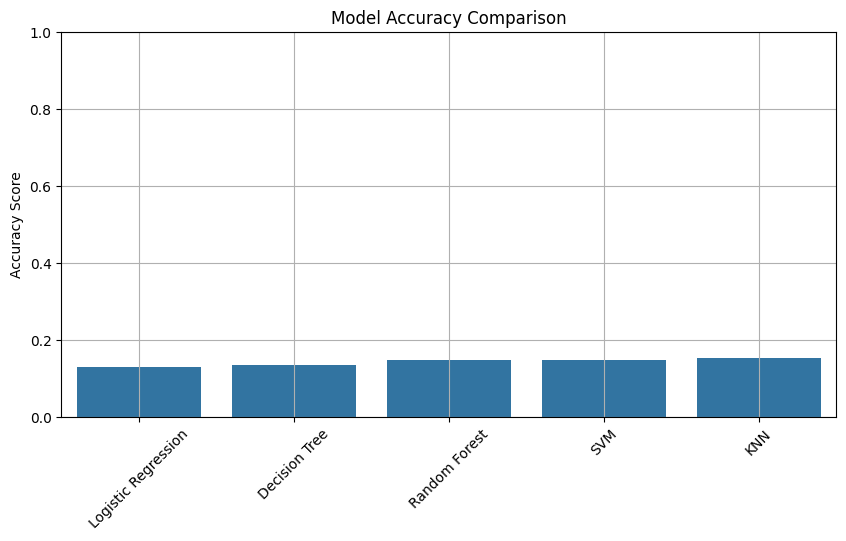

In [12]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = accuracy_score(y_test, y_pred)

# Plotting accuracy comparison
plt.figure(figsize=(10,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()